LaTeX header (do not delete)
$$
\newcommand{\Re}[1]{\mathrm{Re}\left\{ #1 \right\}}
\newcommand{\Im}[1]{\mathrm{Im}\left\{ #1 \right\}}
\newcommand{\avg}[1]{\left< #1 \right>}
$$

# Step 2 -- Damped Oscillations
---

### Equation of motion

Here we consider a 1D oscillator whose motion is governed by the linear ODE

$$
  m\ddot{x} + b\dot{x} + kx = 0.
$$

As before, $m$ is the mass of the oscillator and $k$ is the 'spring constant' of the linear restoring force. Here we have added a term proportional to the velocity. When such terms have the right sign, they give rise to retarding or dissipational forces (e.g., in simple models of air resistance). Here the strenght of the damping is controlled by the parameter $b$. We write the equation of motion as

$$
  \ddot{x} + 2\beta\dot{x} + \omega_{0}^2 x = 0
  \quad\quad\text{with}\quad\quad
  \omega_{0} \equiv \sqrt{\frac{k}{m}}
  \quad,\quad
  \beta \equiv \frac{b}{2m}.
$$

### Solutions

The solutions can be found by starting with the ansatz $x(t)=e^{st}$. Plugging this into the equation of motion yields the auxiliary equation and its roots

$$
  s^2 + 2\beta s + \omega_{0}^2 = 0 
  \quad\quad\Rightarrow\quad\quad
  s_{\pm} = -\beta \pm \sqrt{\beta^2 - \omega_{0}^2}.
$$

There are three different regimes of solutions, depending on the strength of the damping:

$$
  \begin{array}{ll}
    \text{underdamping:} & 
    \beta < \omega_{0} \\
    \text{overdamping:} & 
    \beta > \omega_{0} \\
    \text{critical damping:} & 
    \beta = \omega_{0}
  \end{array}
$$

We will examine each of these cases in turn.

**Exercise [pen & paper]:** verify the expressions for the auxiliary equation and its roots.

## 1. Underdamping

When $\beta < \omega_{0}$, the roots of the auxiliary equation are complex

$$
  s_{\pm} = -\beta \pm i\omega_{1}
  \quad\quad\text{where}\quad\quad
  \omega_{1} = \sqrt{\omega_{0}^2 - \beta^2},
$$

which leads to solutions of the form

$$
  \begin{array}{ll}
    \text{Form 1:} & 
    x(t) = e^{-\beta t}[A_{1}\cos(\omega_{1}t) + B_{1}\sin(\omega_{1}t)] \\
    \text{Form 2:} & 
    x(t) = e^{-\beta t}[A_{2}e^{i\omega_{1}t} + B_{2}e^{-i\omega_{1}t}] \\
    \text{Form 3:} & 
    x(t) = e^{-\beta t}[A\cos(\omega_{1}t - \delta)]
  \end{array}
$$

(See the notebook on simple harmonic oscillations for relationships between these forms.)

We will use form 3 as our prototype. In terms of initial conditions $x_{0}$ and $\dot{x}_{0}$, we have 

$$
  A = \sqrt{x_{0}^2 + \left(\frac{\dot{x}_{0} + \beta x_{0}}{\omega_{1}}\right)^2}
  \quad,\quad
  \delta = \arctan\left(\frac{\dot{x}_{0} + \beta x_{0}}{\omega_{1} x_{0}}\right).
$$

**Exercise [pen & paper]:** verify the above.

**Exercise [matplotlib]:** Using the above results, plot the motion for an underdamped oscillator with initial conditions $x_{0}=L$ and $\dot{x}_{0}=\omega_{0}L$, in terms of an arbitrary length scale $L$.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### position, velocity of an underdamped oscillator ###
def xv_undr(t, omega0, beta, x0, vx0):
    omega1 = np.sqrt(omega0*omega0 - beta*beta)
    A = np.sqrt(x0*x0 + ((vx0 + beta*x0)/omega1)**2)
    delta = np.arctan((vx0 + beta*x0)/(omega1*x0))
    x = A*np.exp(-beta*t)*np.cos(omega1*t - delta)
    vx = -A*np.exp(-beta*t)*(beta*np.cos(omega1*t - delta) + omega1*np.sin(omega1*t - delta))
    return x, vx

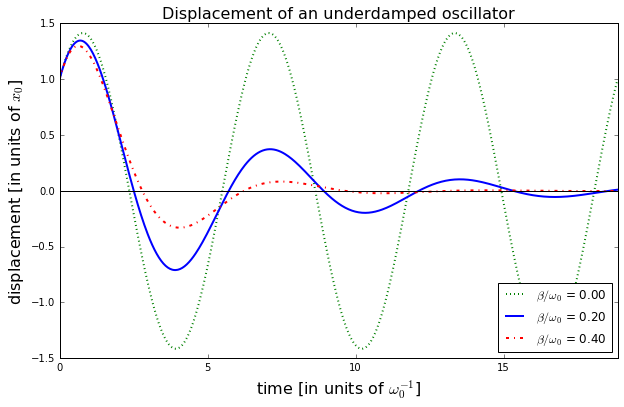

In [3]:
### plot displacement vs time ###
# model parameters
mass = 1.0
omega0 = 1.0
beta = [0.0, 0.2, 0.4]

# initial conditions
x0 = 1.0
vx0 = omega0*x0

# number of undamped periods
n = 3

# uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
plt.figure(figsize=(10,6))
plt.plot(t, xv_undr(t, omega0, beta[0], x0, vx0)[0], 'g:', linewidth=2, 
         label=r'$\beta/\omega_{0}$ = %.2f' % beta[0])
plt.plot(t, xv_undr(t, omega0, beta[1], x0, vx0)[0], 'b-', linewidth=2, 
         label=r'$\beta/\omega_{0}$ = %.2f' % beta[1])
plt.plot(t, xv_undr(t, omega0, beta[2], x0, vx0)[0], 'r-.', linewidth=2, 
         label=r'$\beta/\omega_{0}$ = %.2f' % beta[2])
plt.axhline(y=0, color='k', linewidth=1)
plt.xlim(tmin,tmax)
plt.title(r'Displacement of an underdamped oscillator', fontsize=16)
plt.xlabel(r'time [in units of $\omega_{0}^{-1}$]', fontsize=16)
plt.ylabel(r'displacement [in units of $x_{0}$]', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

## 2. Overdamping

When $\beta > \omega_{0}$, the roots of the auxiliary equation are distinct and real

$$
  s_{\pm} = -\beta \pm \omega_{2}
  \quad\quad\text{where}\quad\quad
  \omega_{2} = \sqrt{\beta^2 - \omega_{0}^2},
$$

which leads to solutions of the form

$$
  x(t) = e^{-\beta t}[A_{2}e^{\omega_{2}t} + B_{2}e^{-\omega_{2}t}] \\
$$

In terms of initial conditions $x_{0}$ and $\dot{x}_{0}$, we have 

$$
  A_{2} = \frac{1}{2}\left(x_{0} + \frac{\dot{x}_{0} + \beta x_{0}}{\omega_{2}}\right)
  \quad,\quad
  B_{2} = \frac{1}{2}\left(x_{0} - \frac{\dot{x}_{0} + \beta x_{0}}{\omega_{2}}\right).
$$

**Exercise [pen & paper]:** verify the above.

**Exercise [matplotlib]:** Using the above results, plot the motion for an underdamped oscillator with initial conditions $x_{0}=L$ and $\dot{x}_{0}=\omega_{0}L$, in terms of an arbitrary length scale $L$.

In [28]:
### position, velocity of an overdamped oscillator ###
def xv_over(t, omega0, beta, x0, vx0):
    omega2 = np.sqrt(beta*beta - omega0*omega0)
    A2 = 0.5*(x0 + (vx0 + beta*x0)/omega2)
    B2 = 0.5*(x0 - (vx0 + beta*x0)/omega2)
    x = np.exp(-beta*t)*(A2*np.exp(omega2*t) + B2*np.exp(-omega2*t))    
    vx = -np.exp(-beta*t)*((beta - omega2)*A2*np.exp(omega2*t) + (beta + omega2)*B2*np.exp(-omega2*t))
    return x, vx

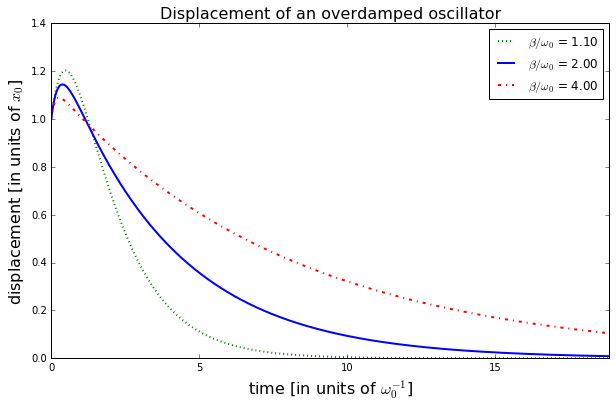

In [30]:
### plot displacement vs time ###
# model parameters
mass = 1.0
omega0 = 1.0
beta = [1.1, 2.0, 4.0]

# initial conditions
x0 = 1.0
vx0 = omega0*x0

# number of undamped periods
n = 3

# uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
plt.figure(figsize=(10,6))
plt.plot(t, xv_over(t, omega0, beta[0], x0, vx0)[0], 'g:', linewidth=2, 
         label=r'$\beta/\omega_{0}$ = %.2f' % beta[0])
plt.plot(t, xv_over(t, omega0, beta[1], x0, vx0)[0], 'b-', linewidth=2, 
         label=r'$\beta/\omega_{0}$ = %.2f' % beta[1])
plt.plot(t, xv_over(t, omega0, beta[2], x0, vx0)[0], 'r-.', linewidth=2, 
         label=r'$\beta/\omega_{0}$ = %.2f' % beta[2])
plt.axhline(y=0, color='k', linewidth=1)
plt.xlim(tmin,tmax)
plt.title(r'Displacement of an overdamped oscillator', fontsize=16)
plt.xlabel(r'time [in units of $\omega_{0}^{-1}$]', fontsize=16)
plt.ylabel(r'displacement [in units of $x_{0}$]', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

## 3. Critical damping

When $\beta = \omega_{0}$, the roots of the auxiliary equation are real, but degenerate

$$
  s_{\pm} = -\beta.
$$

In this case, a second independent solution has the form $te^{-\beta t}$. The general solution then takes the form

$$
  x(t) = e^{-\beta t}[A_{3} + B_{3}t] \\
$$

In terms of initial conditions $x_{0}$ and $\dot{x}_{0}$, we have 

$$
  A_{3} = x_{0}
  \quad,\quad
  B_{3} = \dot{x}_{0} + \beta x_{0}.
$$

**Exercise [pen & paper]:** verify the above.

**Exercise [matplotlib]:** Using the above results, plot the motion for an underdamped oscillator with initial conditions $x_{0}=L$ and $\dot{x}_{0}=\omega_{0}L$, in terms of an arbitrary length scale $L$.

In [24]:
### position, velocity of a critically damped oscillator ###
def xv_crit(t, omega0, beta, x0, vx0):
    A3 = x0
    B3 = vx0 + beta*x0
    x = (A3 + B3*t)*np.exp(-beta*t)
    vx = (B3 - beta*(A3 + B3*t))*np.exp(-beta*t)
    return x, vx

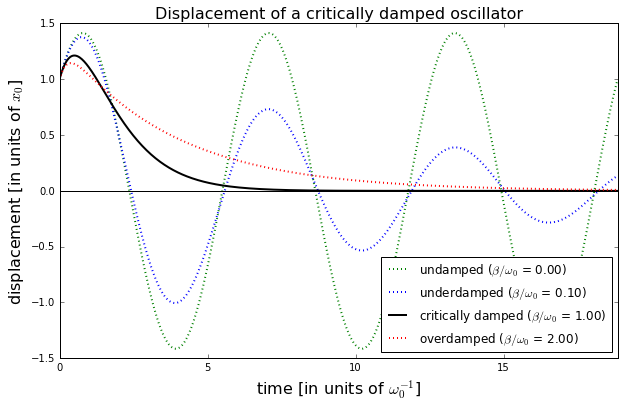

In [31]:
### plot displacement vs time ###
# model parameters
mass = 1.0
omega0 = 1.0
beta = [0.0, 0.1, 1.0, 2.0]

# initial conditions
x0 = 1.0
vx0 = omega0*x0

# number of undamped periods
n = 3

# uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
plt.figure(figsize=(10,6))
plt.plot(t, xv_undr(t, omega0, beta[0], x0, vx0)[0], 'g:', linewidth=2, 
         label=r'undamped ($\beta/\omega_{0}$ = %.2f)' % beta[0])
plt.plot(t, xv_undr(t, omega0, beta[1], x0, vx0)[0], 'b:', linewidth=2, 
         label=r'underdamped ($\beta/\omega_{0}$ = %.2f)' % beta[1])
plt.plot(t, xv_crit(t, omega0, beta[2], x0, vx0)[0], 'k-', linewidth=2, 
         label=r'critically damped ($\beta/\omega_{0}$ = %.2f)' % beta[2])
plt.plot(t, xv_over(t, omega0, beta[3], x0, vx0)[0], 'r:', linewidth=2, 
         label=r'overdamped ($\beta/\omega_{0}$ = %.2f)' % beta[3])
plt.axhline(y=0, color='k', linewidth=1)
plt.xlim(tmin,tmax)
plt.title(r'Displacement of a critically damped oscillator', fontsize=16)
plt.xlabel(r'time [in units of $\omega_{0}^{-1}$]', fontsize=16)
plt.ylabel(r'displacement [in units of $x_{0}$]', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

## 4. Weak damping and time-averaged energy

Here we study the special case of a weakly damped oscillator, defined by $\beta \ll \omega_{0}$. In this case, oscillations occur inside of a well-defined envelope, given by $e^{-\beta t}$. In other words, there is a separation of time scales. There is a short time scale associated with oscillations, given by $\omega_{1}^{-1}$, and a long time scale associated with the decaying amplitude, given by $\beta^{-1}$. Because of this, if we perform time-averaging over the scale $\omega_{0}^{-1}$, we can treat $\beta t$ as being essentially constant (i.e., the change in amplitude on this time scale is negligible).

As a result, if we calculate the time-averaged kinetic energy, potential energy, and total energy, we obtain

$$
  \avg{K} = \frac{1}{2}m\avg{\dot{x}^2} \simeq \frac{1}{4}m\omega_{1}^2 A^2 e^{-2\beta t} \\
  \avg{U} = \frac{1}{2}m\omega_{0}^2\avg{x^2} \simeq \frac{1}{4}m\omega_{0}^2 A^2 e^{-2\beta t} \\
  \avg{E} = \avg{K} + \avg{U} \simeq \frac{1}{2}m\omega_{0}^2 A^2 e^{-2\beta t},
$$

where in the last expression we have also used the approximation $\omega_{1}\simeq\omega_{0}$, valid to first-order in the weakly damped limit.

**Exercise [pen & paper]:** verify the above.

**Exercise [pen & paper]:** show that in the weakly damped limit, the average power dissipated by the damping force, given by $\avg{P} = \avg{b\dot{x}^2}$, is equal to the average energy lost by the oscillator, $\frac{d\avg{E}}{dt}$.

**Exercise [matplotlib]:** In the case of a weakly damped oscillator with $\beta/\omega_{0}=0.05$, plot the instantaneous kinetic energy, potential energy, and total energy on the same plot along with the average total energy, as functions of time. Verify that the average total energy is a reasonable approximation to the instantaneous total energy in this case. 

In [4]:
### avg energy -- use for weak damping only ###
def energy_avg(t, mass, omega0, beta, x0, vx0):
    omega1 = np.sqrt(omega0*omega0 - beta*beta)
    A = np.sqrt(x0*x0 + ((vx0 + beta*x0)/omega1)**2)
    return 0.25*mass*(omega0*omega0 + omega1*omega1)*A*A*np.exp(-2*beta*t)

In [5]:
### energy of a damped oscillator ###
def energy(t, mass, omega0, beta, x0, vx0, xvfxn):
    x = xvfxn(t, omega0, beta, x0, vx0)[0]
    vx = xvfxn(t, omega0, beta, x0, vx0)[1]
    ke = 0.5*mass*vx*vx
    pe = 0.5*mass*omega0*omega0*x*x
    etot = ke + pe
    return ke, pe, etot

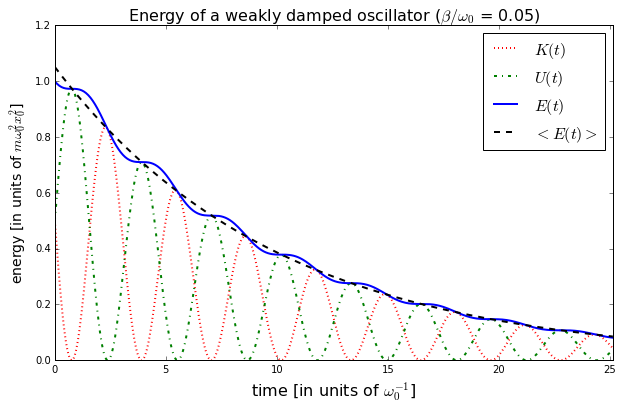

In [6]:
### plot energy vs time ###
# model parameters
mass = 1.0
omega0 = 1.0
beta = 0.05 #must be weak for the notion of avg energy to make sense

# initial conditions
x0 = 1.0
vx0 = omega0*x0

# number of undamped periods
n = 4

# create uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
plt.figure(figsize=(10,6))
plt.plot(t, energy(t, mass, omega0, beta, x0, vx0, xv_undr)[0], 'r:', linewidth=2, label=r'$K(t)$')
plt.plot(t, energy(t, mass, omega0, beta, x0, vx0, xv_undr)[1], 'g-.', linewidth=2, label=r'$U(t)$')
plt.plot(t, energy(t, mass, omega0, beta, x0, vx0, xv_undr)[2], 'b-', linewidth=2, label=r'$E(t)$')
plt.plot(t, energy_avg(t, mass, omega0, beta, x0, vx0), 'k--', linewidth=2, label=r'$<E(t)>$')
plt.xlim(tmin,tmax)
plt.title(r'Energy of a weakly damped oscillator ($\beta/\omega_{0}$ = %.2f)' % beta, fontsize=16)
plt.xlabel(r'time [in units of $\omega_{0}^{-1}$]', fontsize=16)
plt.ylabel(r'energy [in units of $m\omega_{0}^2 x_{0}^2$]', fontsize=14)
plt.legend(loc='upper right', fontsize=16)
plt.show()